In [1584]:
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_excel('Dataset/Salaries.xlsx')

# Data Description

In [1585]:
print("Rows * Columns : ", data.shape)

Rows * Columns :  (607, 11)


In [1586]:
df = data

# Encoding Ordinal Variable : Exprience

<AxesSubplot:xlabel='Experience', ylabel='Salary in USD'>

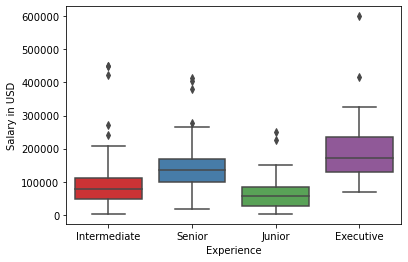

In [1587]:
sns.boxplot(x="Experience", y="Salary in USD", data=df,palette='Set1')

In [1588]:
from sklearn.preprocessing import OrdinalEncoder
experience = ["Junior", "Intermediate", "Senior", "Executive"]
enc = OrdinalEncoder(categories=[experience])
df.Experience = enc.fit_transform(df[["Experience"]])

# Encoding Ordinal Variable : Type

<AxesSubplot:xlabel='Type', ylabel='Salary in USD'>

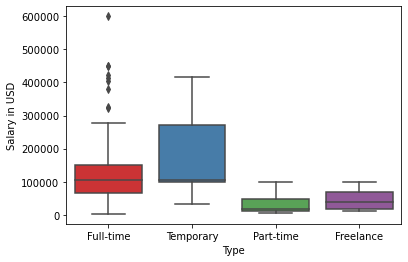

In [1589]:
sns.boxplot(x="Type", y="Salary in USD", data=df,palette='Set1')

In [1590]:
type_col = ["Part-time", "Freelance", "Full-time","Temporary"]
enc = OrdinalEncoder(categories=[type_col])
df.Type = enc.fit_transform(df[["Type"]])

# Encoding Ordinal Variable : Remote work

<AxesSubplot:xlabel='Remote work', ylabel='Salary in USD'>

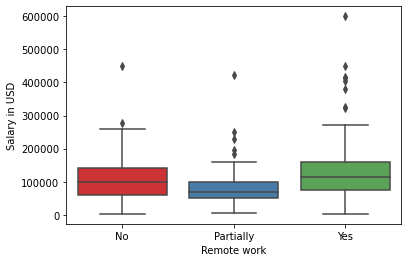

In [1591]:
sns.boxplot(x="Remote work", y="Salary in USD", data=df,palette='Set1')

In [1592]:
remote = ["No", "Partially", "Yes"]
enc3 = OrdinalEncoder(categories=[remote])
df["Remote work"] = enc3.fit_transform(df[["Remote work"]])

# Encoding Ordinal Variable : Company Size

<AxesSubplot:xlabel='Company size', ylabel='Salary in USD'>

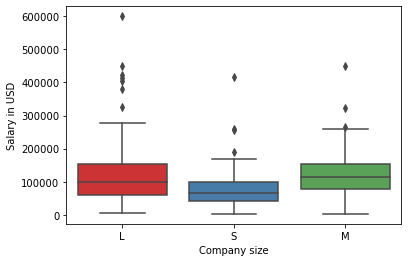

In [1593]:
sns.boxplot(x="Company size", y="Salary in USD", data=df,palette='Set1')

In [1594]:
size = ["S", "M", "L"]
enc4 = OrdinalEncoder(categories=[size])
df["Company size"] = enc4.fit_transform(df[["Company size"]])

# Encoding Ordinal Variable : Title

In [1595]:
titles = df["Title"].value_counts() 
for a in range(titles.size): 
    if 'MANAGER' in titles.index[a].upper() or 'HEAD OF' in titles.index[a].upper() or 'DIRECTOR' in titles.index:
        df.replace({'Title':{titles.index[a]:'Manager'}},inplace=True) 
    elif 'SCIENTIST' in titles.index[a].upper() or 'SCIENCE' in titles.index[a].upper() or 'RESEARCH' in titles.index:
        df.replace({'Title':{titles.index[a]:'ML Scientist'}},inplace=True) 
    elif 'ENGINEER' in titles.index[a].upper(): 
        df.replace({'Title':{titles.index[a]:'ML Engineer'}},inplace=True) 
    else: 
        df.replace({'Title':{titles.index[a]:'Other'}},inplace=True) 
       


<AxesSubplot:xlabel='Title', ylabel='Salary in USD'>

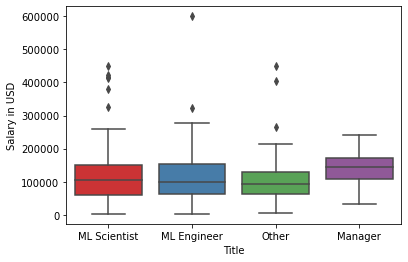

In [1596]:
sns.boxplot(x="Title", y="Salary in USD", data=df,palette='Set1')

In [1597]:
title = ["Other", "ML Engineer","ML Scientist", "Manager"]
enc0 = OrdinalEncoder(categories=[title])
df.Title = enc0.fit_transform(df[["Title"]])

# Encoding Ordinal Variable : Company Location

In [1598]:
locations = data["Company location"].value_counts() 
for loc in range(locations.size): 
    if locations[loc]<30: 
        df.replace({'Company location':{locations.index[loc]:'Other'}},inplace=True) 

<AxesSubplot:xlabel='Company location', ylabel='Salary in USD'>

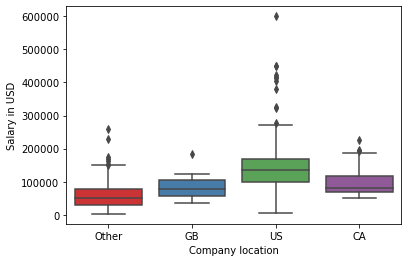

In [1599]:
sns.boxplot(x="Company location", y="Salary in USD", data=df,palette='Set1')

In [1600]:
size = ["Other", "GB", "CA", "US"]
enc9 = OrdinalEncoder(categories=[size])
df["Company location"] = enc9.fit_transform(df[["Company location"]])

# Cleaning and Spliting the data

In [1601]:
from sklearn.model_selection import train_test_split

# Removing Outliers
df.drop(df[df['Salary in USD']<15000].index,inplace=True) 
df.drop(df[df['Salary in USD']>300000].index,inplace=True) 
df = df.drop(["Salary", "Currency", 'Residence'], axis=1)
# Assigning the features and target values 
x = df.drop(['Salary in USD'], axis=1)
y = df['Salary in USD']
# Splitting


In [1645]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=77)

 # Importing Metrics and Models

In [1646]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR 

In [1647]:
# Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)
predicted = lr.predict(x_test)
print("Mean absolute Error of Linear Regression model: ", mean_absolute_error(y_test, predicted))


Mean absolute Error of Linear Regression model:  27376.048550715004


In [1581]:
#Support Vector Regressor

SVR = SVR()
SVR.fit(x_train, y_train)
predicted2 = SVR.predict(x_test)
print("Mean absolute Error of SVT: ", mean_absolute_error(y_test, predicted2))

Mean absolute Error of SVT:  45329.784251644654
